# Categorical Analysis

## Dataset: Exam Score Prediction

## Dataset Link : https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset
## Total Number of columns: 13

## Details about the dataset

### This dataset provides an extensive and realistic representation of various factors that contribute to student exam performance

- 'student_id' - individual id for every student 
- 'age'  : age of the student
- 'gender' : sex of each student
- 'course'  : course they are enrolled in 
- 'study_hours'  : number of hours studying per day
- 'class_attendance'  : attendance Percentage
- 'internet_access'  :  boolean value of having internet access or not
- 'sleep_hours'  : daily sleeping duration
- 'sleep_quality'  : Quality of sleep (Poor/Average/Good)
- 'study_method'  :    Primary study technique
- 'facility_rating'  : Academic environment indicators such as facility rating
- 'exam_difficulty'  : exam difficulty in categorical(easy/moderate/hard)
- 'exam_score' : Final Score value (from 1 to 100)

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
df = pd.read_csv("Data/Exam_Score_Prediction.csv")

In [3]:
df.info() 

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  str    
 3   course            20000 non-null  str    
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  str    
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  str    
 9   study_method      20000 non-null  str    
 10  facility_rating   20000 non-null  str    
 11  exam_difficulty   20000 non-null  str    
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), str(7)
memory usage: 2.0 MB


In [4]:
df.shape

(20000, 13)

In [5]:
df.duplicated().any()

np.False_

In [6]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

### No missing values in the dataset. So we don't need to handle it for this data

In [7]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [8]:
df = df.set_index('student_id')

In [9]:
df.columns

Index(['age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='str')

In [18]:
df['study_method'].value_counts()

study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

<Axes: xlabel='study_method', ylabel='count'>

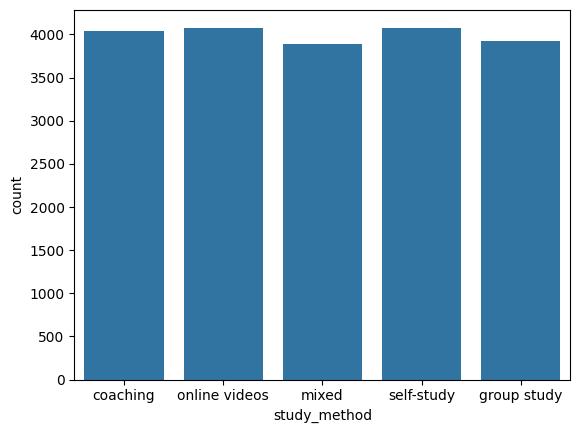

In [12]:
sns.countplot(data=df,x='study_method')

In [19]:
df['internet_access'].value_counts()

internet_access
yes    16988
no      3012
Name: count, dtype: int64

In [39]:
encoding_internet = {'yes': 1, 'no': 0}
df['internet_access'] = df['internet_access'].map(encoding_internet)

<Axes: xlabel='internet_access', ylabel='count'>

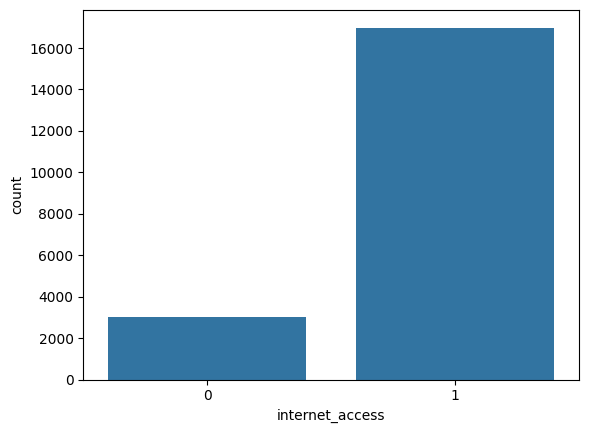

In [41]:
sns.countplot(data=df,x='internet_access')

In [8]:
df['sleep_quality'].value_counts()

sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

In [42]:
encoding_sleep={'poor':0,'average':1,'good':2}
df['sleep_quality']=df['sleep_quality'].map(encoding_sleep)

<Axes: xlabel='sleep_quality', ylabel='count'>

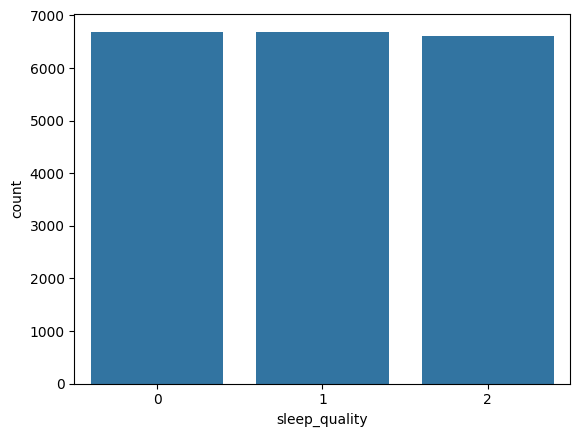

In [43]:
sns.countplot(data=df,x='sleep_quality')

In [10]:
df['gender'].value_counts()

gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

In [45]:
encoding_gender={'male':0,'female':1,'other':2}
df['gender']=df['gender'].map(encoding_gender)

<Axes: xlabel='gender', ylabel='count'>

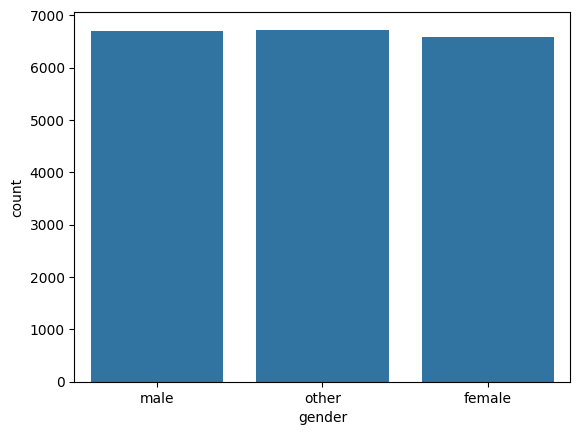

In [15]:
sns.countplot(data=df,x='gender')

In [11]:
df['course'].value_counts()

course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

<Axes: xlabel='course', ylabel='count'>

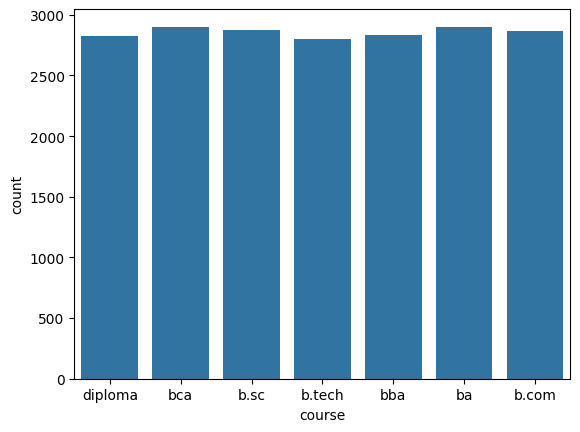

In [17]:
sns.countplot(data=df,x='course')

In [20]:
df['facility_rating'].value_counts()

facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

In [49]:
encoded_rating={'low':0,'medium':1,'high':2}
df['facility_rating']=df['facility_rating'].map(encoded_rating)

<Axes: xlabel='facility_rating', ylabel='count'>

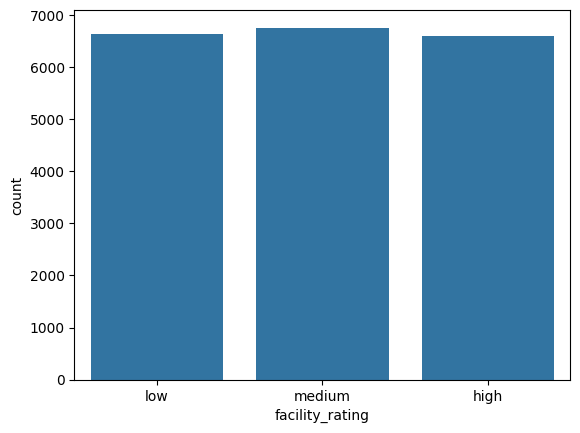

In [18]:
sns.countplot(data=df,x='facility_rating')

<Axes: xlabel='study_hours', ylabel='exam_score'>

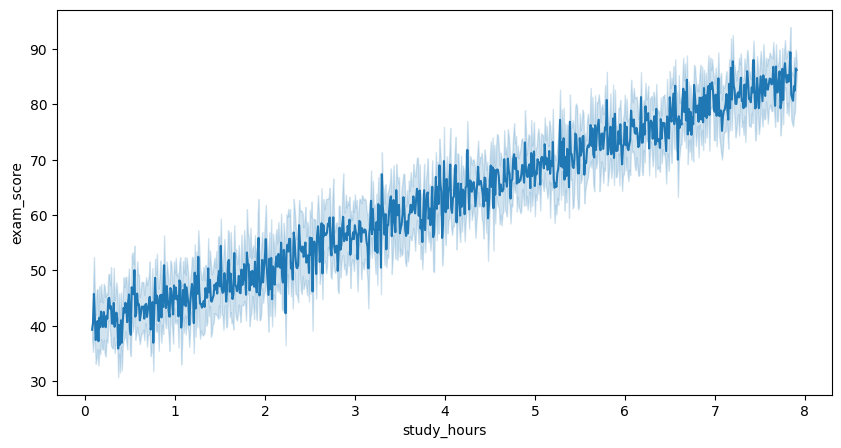

In [38]:

df_sampled = df.sample(n=100)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df,x='study_hours',y='exam_score')


<Axes: xlabel='study_hours', ylabel='exam_score'>

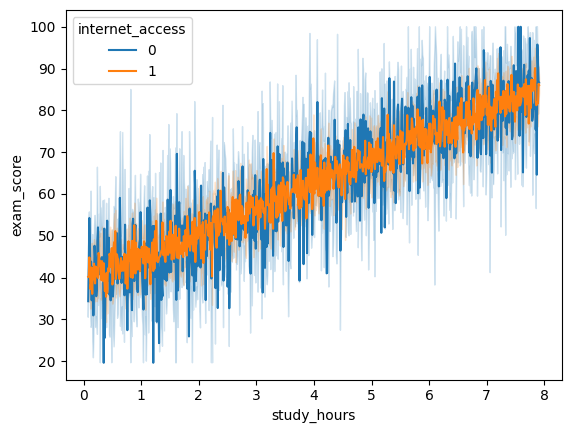

In [46]:
sns.lineplot(data=df, x='study_hours', y='exam_score', hue='internet_access')

In [61]:
scaler = MinMaxScaler()
features=['age','exam_score','sleep_hours','study_hours']
df[features]=scaler.fit_transform(df[features])

In [59]:
df.describe()

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.496186,1.001550,4.007604,70.017365,0.849400,0.501476,0.996600,0.998200,0.533752
std,0.326351,0.819195,2.308313,17.282262,0.357667,0.298636,0.815673,0.813652,0.235177
min,0.000000,0.000000,0.080000,40.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,2.000000,55.100000,1.000000,0.241379,0.000000,0.000000,0.363192
50%,0.428571,1.000000,4.040000,69.900000,1.000000,0.500000,1.000000,1.000000,0.534832
75%,0.714286,2.000000,6.000000,85.000000,1.000000,0.758621,2.000000,2.000000,0.705228
max,1.000000,2.000000,7.910000,99.400000,1.000000,1.000000,2.000000,2.000000,1.000000


In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

ValueError: could not convert string to float: 'diploma'

<Figure size 1000x600 with 0 Axes>